<a href="https://colab.research.google.com/github/poojaneuusa/Image-Processing-Projects/blob/main/Image_Search_from_Hindi_Spanish_French_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

!unzip 'unsplash-25k-photos.zip' -d 'photos'

img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))


img_names[0]

img_model = SentenceTransformer('clip-ViT-B-32')

img_embed = img_model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

img_folder = '/photos'

def search(query, top_k=3):
  query_embed = model.encode([query], convert_to_tensor=True)

  hits = util.semantic_search(query_embed, img_embed, top_k=top_k)[0]

  # print(hits)

  print('Query: ', query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()











Query:  Billi
photos/F7hurtVH1TY.jpg


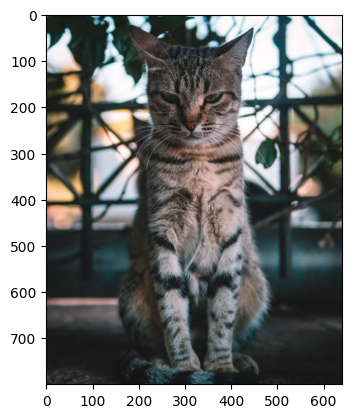

photos/DKrinqB5axI.jpg


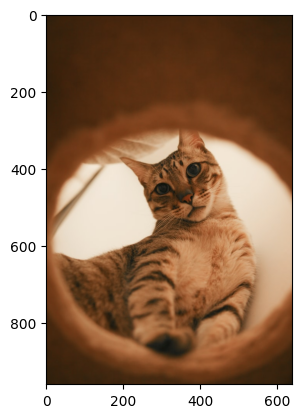

photos/3LPGWASiSbM.jpg


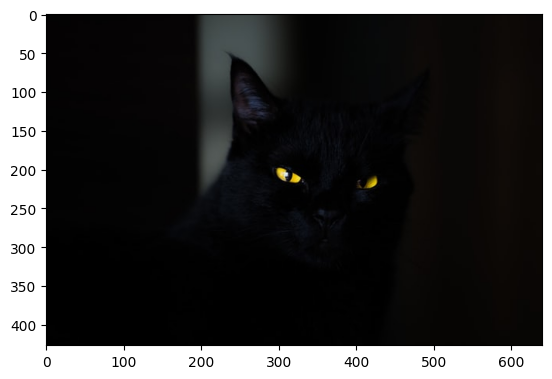

In [ ]:
# Hindi
search('Billi')

Query:  Chat
photos/m-InFQ9clVU.jpg


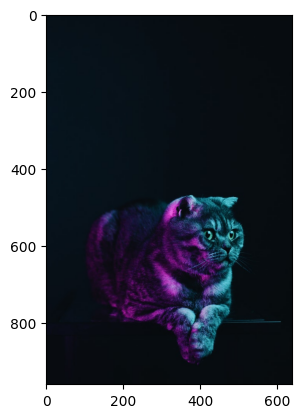

photos/F7hurtVH1TY.jpg


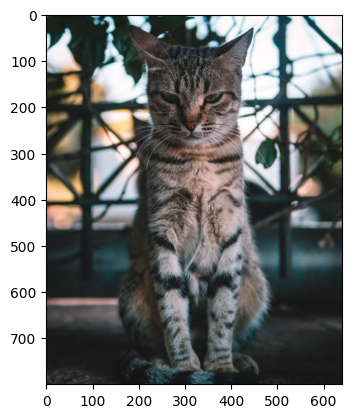

photos/DKrinqB5axI.jpg


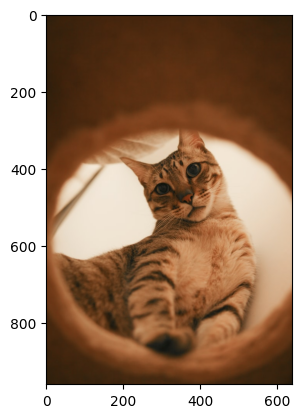

In [ ]:
# French
search('Chat')

Query:  Gato
photos/m-InFQ9clVU.jpg


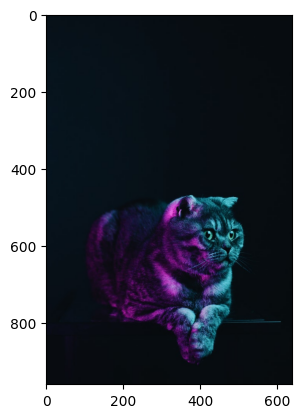

photos/F7hurtVH1TY.jpg


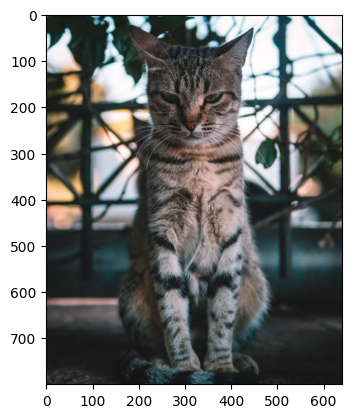

photos/RL8TVeilWGc.jpg


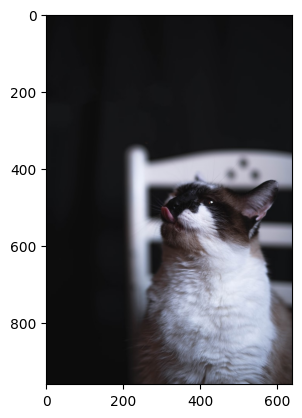

In [ ]:
# Spanish
search('Gato')